<a href="https://colab.research.google.com/github/Arudohi/Ardhi/blob/main/Scientific_Computing/2702276696_Ardhi_Bagas_Rangga_Wardhana_Interpolation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

<ipython-input-18-e3ebae51780d>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


Linear Interpolation

In [ ]:
x = [0, 1, 2, 3, 4, 5]
y = [1, 3, 3, 5, 2, 2]

In [ ]:
f = interp1d(x,y)

x_lin = np.linspace(0, 5, 100)
y_lin = f(x_lin)

y_ask = f(3.1)
print(y_ask)

4.699999999999999


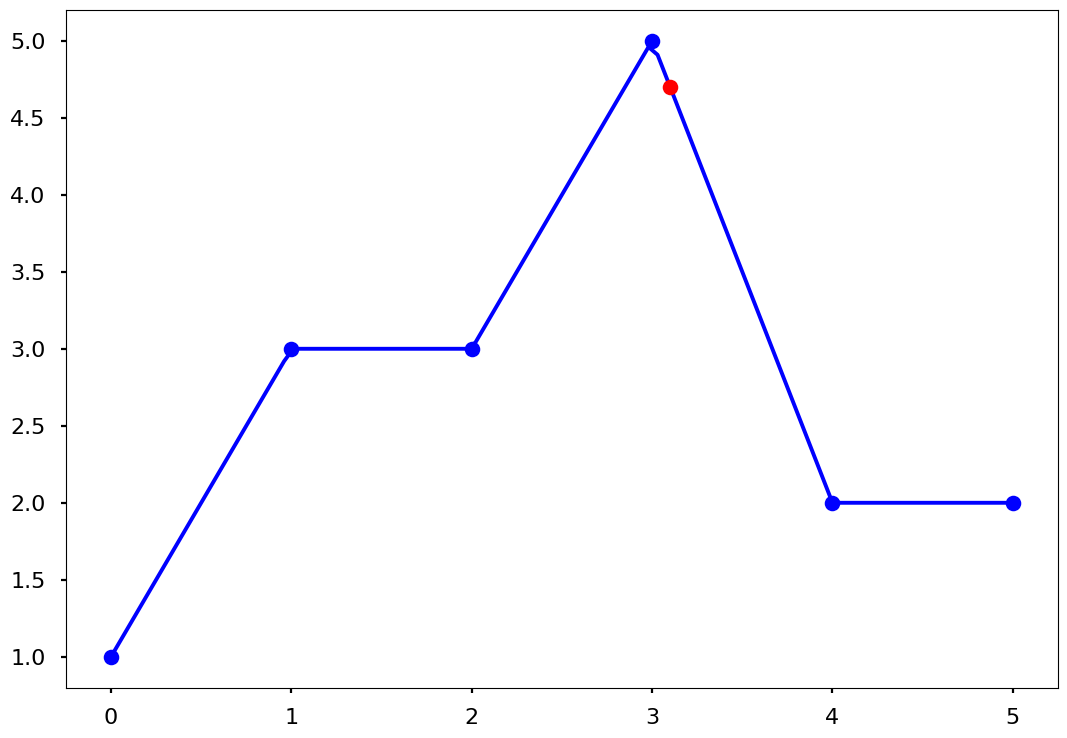

In [ ]:
plt.plot(x, y, 'ob')
plt.plot(x_lin, y_lin, 'b')
plt.plot(3.1, f(3.1), 'ro')
plt.show()

Newton Interpolation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')

%matplotlib inline
def divided_diff(x,y):
  '''
  function to calculate the devided different table
  '''
  n = len(y)
  coef = np.zeros([n,n])
  # a first coloum is y
  coef[:,0] = y

  for j in range (1,n):
    for i in range (n-j):
      coef[i][j] = \
      (coef[i+1][j-1] - coef[i][j-1])/(x[i+j]-x[i])

  return coef

def newton_poly(coef,x_data,x):
  '''
  evaluate the newton polynomial
  at x
  '''
  n = len(x_data) - 1
  p = coef[n]
  for k in range (1,n+1):
    p = coef[n-k] + (x -x_data[n-k])*p
  return p

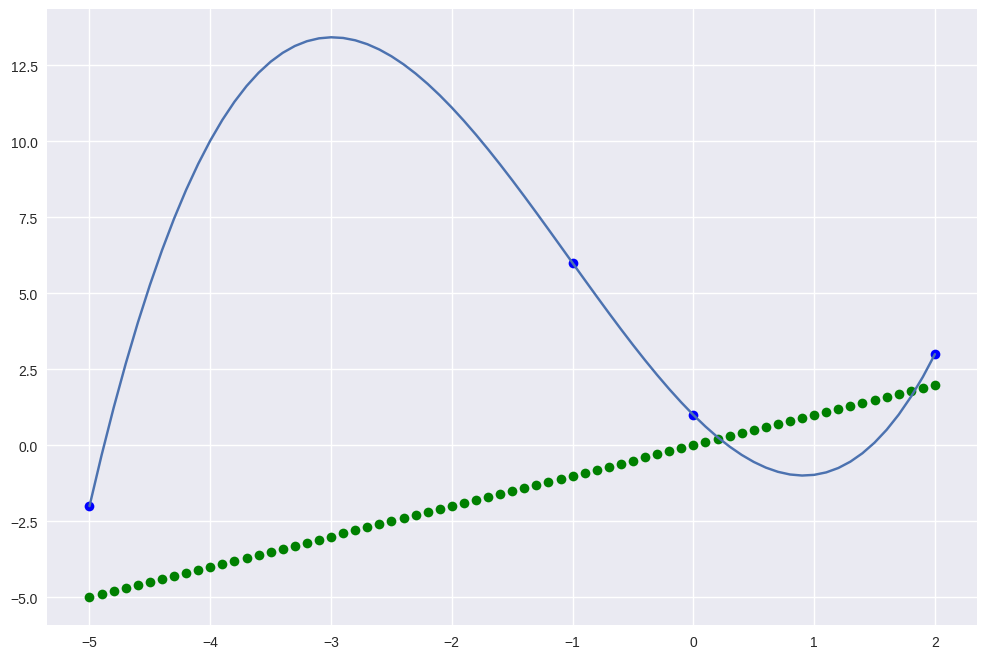

In [ ]:
x = np.array([-5,-1,0,2])
y = np.array([-2,6,1,3])
# get the divided difference coef
a_s = divided_diff(x,y)[0,:]
# evaluate on new data points
x_new = np.arange(-5,2.1,.1)
y_new = newton_poly(a_s,x,x_new)
plt.figure(figsize = (12,8))
plt.plot(x,y,'bo')
plt.plot(x_new,x_new,'go')
plt.plot(x_new,y_new)

Cubic Spline Interpolation

In [ ]:
x = [0, 1, 2, 3, 4, 5]
y = [1, 3, 3, 5, 2, 2]

In [ ]:
f = CubicSpline(x,y,bc_type='natural')

x_cub = np.linspace(0,5,100)
y_cub = f(x_cub)

y_ask = f(2.9)
print(y_ask)

5.000368421052631


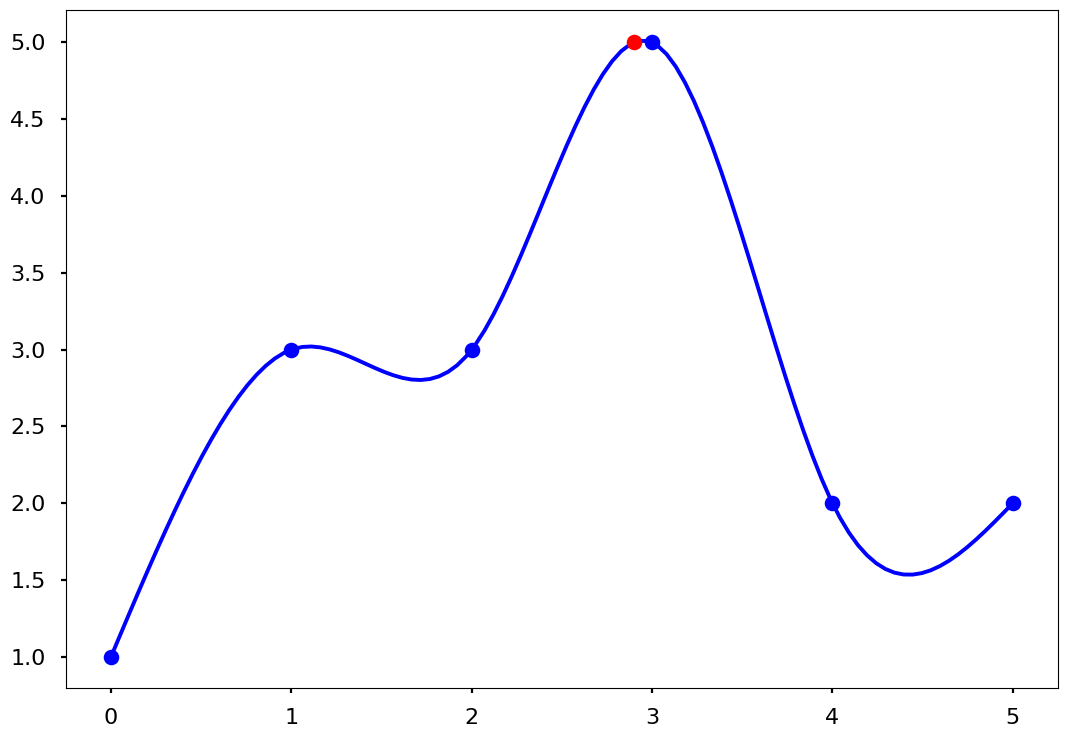

In [ ]:
plt.plot(x,y, 'bo')
plt.plot(x_cub,y_cub, 'b')
plt.plot(2.9,f(2.9), 'ro')
plt.show()